In [3]:
import pandas as pd
import seaborn as sns
import math as m
import scipy.stats as st
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk


In [4]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression


In [5]:
df_diamonds = pd.read_csv('diamond.csv')
df_diamonds.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


#Data Preperation

In [6]:
#Isolate x and y
y = df_diamonds[['price']]
x = df_diamonds[['carat']]

In [7]:
# Create the constant
x = sm.add_constant(x)

# Linear Regression

In [8]:
# Regression Model
model1 = sm.OLS(y,x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          3.04e-150
Time:                        10:37:07   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

In [9]:
#Interpretation
# Coef, one carat increase increases price by 11.6k
# CI 11.1k to 12.1k at 95%
# R-squared (only 1 variable, adjusted R is for multiple variable) says the
# dependant variable, carat, explains 89.3% of the independent variable
# Signficance if P>|t| is less than 0.05 we have statistical significance %%

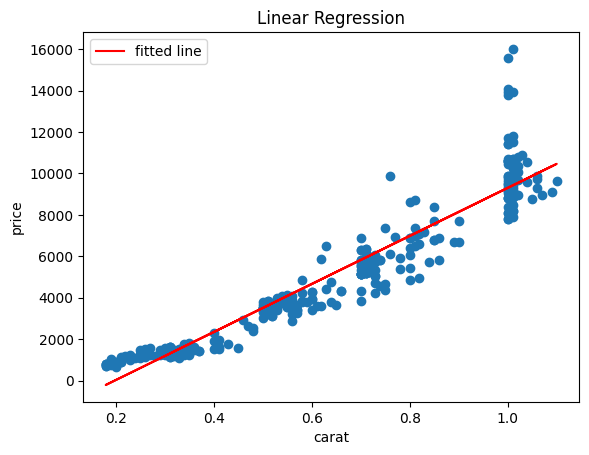

In [10]:
# plotting
x = df_diamonds.carat
plt.plot(x,y,'o')
b, a = np.polyfit(x, y, 1)
plt.plot(x, a + b * x, 'r', label='fitted line')
plt.legend()
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Linear Regression')
plt.show()

# Regression with Dummy variables


In [12]:
# Question: Create a linear regression with binary variable, carat above or below the mean and plot as above
df_diamonds.carat.describe()



count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [24]:
df_diamonds['carat_binary'] = np.where(df_diamonds.carat > df_diamonds.carat.mean(),1,0)

In [25]:
df_diamonds.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [26]:
x1 = df_diamonds[['carat_binary']]
y1 = df_diamonds[['price']]
x1 = sm.add_constant(x1)
model_bin = sm.OLS(y1,x1).fit()
print(model_bin.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     601.0
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           3.54e-74
Time:                        10:56:30   Log-Likelihood:                -2774.0
No. Observations:                 308   AIC:                             5552.
Df Residuals:                     306   BIC:                             5559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2307.1592    158.014     14.601   

Text(0, 0.5, 'price')

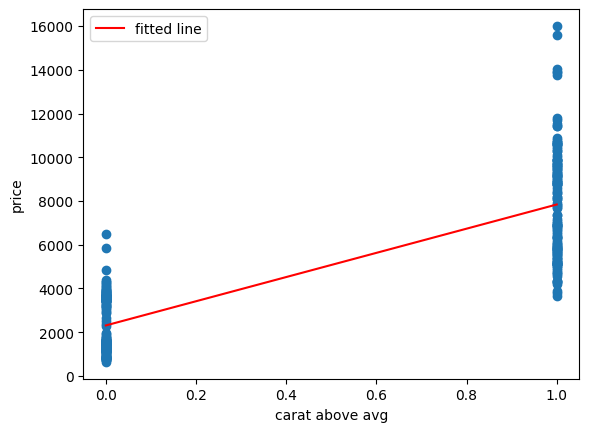

In [28]:

x1= df_diamonds.carat_binary
plt.plot(x1,y1,'o')
b, a = np.polyfit(x1, y1, 1)
plt.plot(x1, a + b * x1, 'r', label='fitted line')
plt.legend()
plt.xlabel('carat above avg')
plt.ylabel('price')